# Figure 5  - Two types of exons involved in sex-biased exon skipping. 

- **(a)** log fold change expression vs. log fold change inclusion for all sex-biased events in mammary tissue. A higher fold change of female-to-male expression corresponds to a higher value on the X axis, and a higher fold change of female-to-male skipping-to-inclusion counts on the Y axis. Both fold changes are calculated by limma. Type I events showed a higher frequency of exon skipping in females and type II events showed a higher frequency of inclusion in females. Exon-skipping events are shown in blue instead of red if at least one RBP was significantly associated with the exon-skipping event. The brown lines represent a fit of the points by second-order polynomial regression. 

- **(b)** Comparison of the sum of acceptor and donor
splice scores for type I and type II exons (t-test). 

- **(c)** Comparison of the sum of exon lengths for type I and type II
exons (t-test).

## **NOTE**:

We assume that you have cloned the analysis repository and have `cd` into the parent directory. Before starting with the analysis make sure you have first completed the dependencies set up by following the instructions described in the **`dependencies/README.md`** document. All paths defined in this Notebook are relative to the parent directory (repository). Please close this Notebook and start again by following the above guidelines if you have not completed the aforementioned steps.

# Questions

- [ ] Where can we find this file? `/Users/karleg/Downloads/SplicingCalculatorData/hg38_ensembl_splicing_calculator_output.tsv`
- [ ] Has this file been generated by running a script and if so which one?
- [ ] `meta.data<-read.table('2017December8GTExRNASeqSRARunTable.txt',sep='\t',header=TRUE)` data?
- [ ] `read.table(paste('/Users/karleg/Dimorph/gene_expression/DE_result_',comp,'.txt',sep=''))`
- [ ] `as.tab<-read.table(paste('/Users/karleg/Dimorph/other/',paste(tissue.set,collapse='.'),event.type,'.txt',sep=''))`
- [ ] `event.ensembl.map<-read.table(paste('/Users/karleg/Dimorph/fromGTF.',toupper(event.type),'.txt',sep=''),header=T)`


## Loading dependencies

In [37]:
Sys.setenv(TAR = "/bin/tar") # for .gz files

# dataviz dependencies
library(ggplot2)
library(visdat)
library(patchwork)
library(ggsci)
library(grid)
library(report)

## 5a. (check script [dimorphAS/figures/figure4c](https://github.com/TheJacksonLaboratory/sbas/blob/master/dimorphAS/figures/figure4/figure4c.R)) Log-fold change expression vs. log fold change inclusion for all sex-biased events in mammary tissue.

Some text for describing what is going to be executed and what it will produce

code from: [../dimorphAS/figures/figure4/Daniels_ScoresHeartLV.R](https://github.com/TheJacksonLaboratory/sbas/blob/master/dimorphAS/figures/figure4/Daniels_ScoresHeartLV.R)

## Retrieving the required data

```
inc.iso.counts<-read.csv('../data/rmats_final.se.jc.ijc.txt',header=TRUE)
skip.iso.counts<-read.csv('../data/rmats_final.se.jc.sjc.txt',header=TRUE)
s.tab<-read.csv('/Users/karleg/Downloads/SplicingCalculatorData/hg38_ensembl_splicing_calculator_output.tsv',sep='\t',header = T)
s.tab<-s.tab[s.tab$DONOR!='NaN' & s.tab$ACCEPTOR!='NaN',]
s.tab<-cbind(s.tab,paste(paste0('chr',s.tab$X.CHR),s.tab$BEGIN,s.tab$END,s.tab$STRAND,sep='-'))

colnames(s.tab)[ncol(s.tab)]<-'EXON_ID'

setwd('/Users/karleg/Dimorph/')

meta.data<-read.table('2017December8GTExRNASeqSRARunTable.txt',sep='\t',header=TRUE)

tissue.set<-"Heart - Left Ventricle"

comp<-tissue.set

event.type<-'se'

de.tab<-read.table(paste('/Users/karleg/Dimorph/gene_expression/DE_result_',comp,'.txt',sep=''))
      
as.tab<-read.table(paste('/Users/karleg/Dimorph/other/',paste(tissue.set,collapse='.'),event.type,'.txt',sep=''))
      
event.ensembl.map<-read.table(paste('/Users/karleg/Dimorph/fromGTF.',toupper(event.type),'.txt',sep=''),header=T)
      
event.ensembl.map<-event.ensembl.map[event.ensembl.map$ID %in% rownames(as.tab),]
      
rownames(event.ensembl.map)<-event.ensembl.map$ID
      
as.tab<-merge(as.tab,event.ensembl.map,by='row.names')
      
as.tab<-as.tab[as.tab$geneSymbol %in% rownames(de.tab),]
      
sig.events<-read.table(paste('/Users/karleg/Dimorph/other/',paste(tissue.set,collapse = '.'),event.type,'.txt',sep=''))
    
sig.events<-sig.events[sig.events$adj.P.Val<=0.05 & abs(sig.events$logFC)>=log2(1.5),]
      
de.tab<-de.tab[rownames(de.tab) %in% as.tab$geneSymbol,]
      
as.tab<-cbind(as.tab,rep(0,nrow(as.tab)))
      
colnames(as.tab)[ncol(as.tab)]<-'DE.logFC'
      
for (i in (1:nrow(as.tab)))
        
    as.tab[i,'DE.logFC']<-de.tab$logFC[which(rownames(de.tab)==as.tab$geneSymbol[i])]

as.tab<-as.tab[as.tab$Row.names %in% rownames(sig.events),]


s.tab<-s.tab[!duplicated(s.tab$EXON_ID),] #remove this to count one score per transcript instead of per exon

as.tab1<-as.tab[as.tab$logFC<0 & as.tab$DE.logFC>0,]

group.1<-which((s.tab$END %in% as.tab1$exonEnd) & (s.tab$BEGIN %in% as.tab1$exonStart_0base) & (paste0('chr',s.tab$X.CHR) %in% as.tab1$chr) & (s.tab$STRAND %in% as.tab1$strand))


as.tab2<-as.tab[as.tab$logFC>0 & as.tab$DE.logFC>0,]

group.2<-which((s.tab$END %in% as.tab2$exonEnd) & (s.tab$BEGIN %in% as.tab2$exonStart_0base) & (paste0('chr',s.tab$X.CHR) %in% as.tab2$chr) & (s.tab$STRAND %in% as.tab2$strand))


scores.group.1<-s.tab$DONOR[group.1]+s.tab$ACCEPTOR[group.1]

scores.group.2<-s.tab$DONOR[group.2]+s.tab$ACCEPTOR[group.2]

t.test(scores.group.1,scores.group.2)

df<-data.frame(score=c(scores.group.1,scores.group.2),type=c(rep(1,length(scores.group.1)),rep(2,length(scores.group.2))))

pn<-ggplot(df, aes(x=type, y=score,group=type,fill=type))  + geom_boxplot(notch=TRUE) + theme_minimal()  
pn<- pn + theme(axis.text = element_text(size=0, hjust=0.5),axis.ticks.x=element_blank(),
                axis.title.x=element_blank(),
                axis.title.y = element_text(face="bold",  size=22),
                axis.text.y = element_text(size=22),
                legend.position="none")   +ylab('Score')
my.pval = paste0("p==", t.test(scores.group.1,scores.group.2)$p.value)
pn <- pn + annotate("text", x=1.4, y=5, label= as.character(my.pval),parse=TRUE, fontface="bold", size=8) 
pn

```

Warning message:
“Removed 606 rows containing non-finite values (stat_boxplot).”

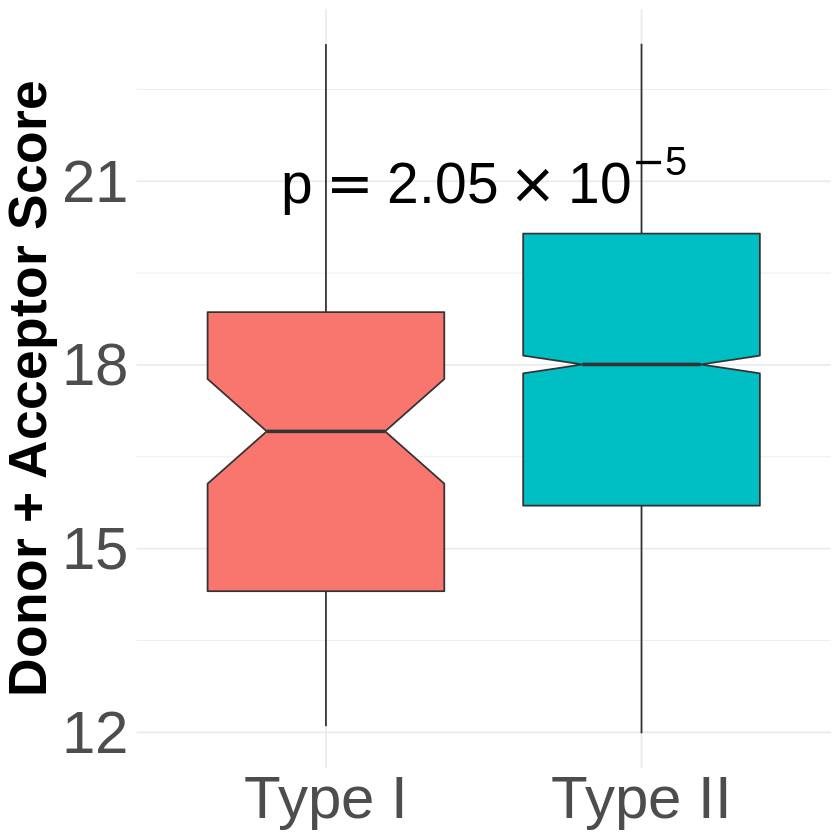

In [38]:
#############  LOAD DATA FROM THE ABOVE
# Removal all variables from workspace
rm(list=ls())
#Before running the following, use the Session menu to set working directory to source file location
load('../dimorphAS/figures/figure4/daniels_scoresHeartLV.RData')
library(ggplot2)
library(ggsci)


npgBlue<- rgb(60/256,84/256,136/256,1)
npgRed <- rgb(220/256,0,0,0.5)
npgColors <- c(npgBlue,npgRed)


df$type <- as.factor(df$type)  # colors dont work with df$type being numbers


pn<-ggplot(df, aes(x=type, y=score,fill=type, group=type))  + geom_boxplot(notch=TRUE, outlier.shape=NA) + theme_minimal()  
pn<-pn+ scale_y_continuous(limits = quantile(df$score, c(0.1, 0.9))) + guides(fill=FALSE)
pn<- pn + theme(axis.text = element_text(size=0, hjust=0.5),axis.ticks.x=element_blank(),
                axis.title.x=element_blank(),
                axis.title.y = element_text(face="bold",  size=32),
                axis.text.x = element_text(size=36),
                axis.text.y = element_text(size=36),
                legend.position="none")   +ylab('Donor + Acceptor Score')
#pn <- pn +  scale_fill_npg() 
my.pval = paste0("p==", t.test(scores.group.1,scores.group.2)$p.value)
# p val is 2.05e-05
my.pval = "p==2.05 %*% 10 ^ -5"  ##
pn <- pn + annotate("text", x=1.5, y=21, label= as.character(my.pval),parse=TRUE, fontface="bold", size=12) 
pn1<-pn
pn1

Warning message in mean.default(df$score[df$type == "Type I"]):
“argument is not numeric or logical: returning NA”

[1] NA

Warning message in mean.default(df$score[df$type == "Type II"]):
“argument is not numeric or logical: returning NA”

[1] NA

[1] 93

[1] 3088

[1] 150.6613

[1] 246.9785


	Wilcoxon rank sum test with continuity correction

data:  e.lengths.group1 and e.lengths.group2
W = 130552, p-value = 0.1351
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 610 rows containing non-finite values (stat_boxplot).”

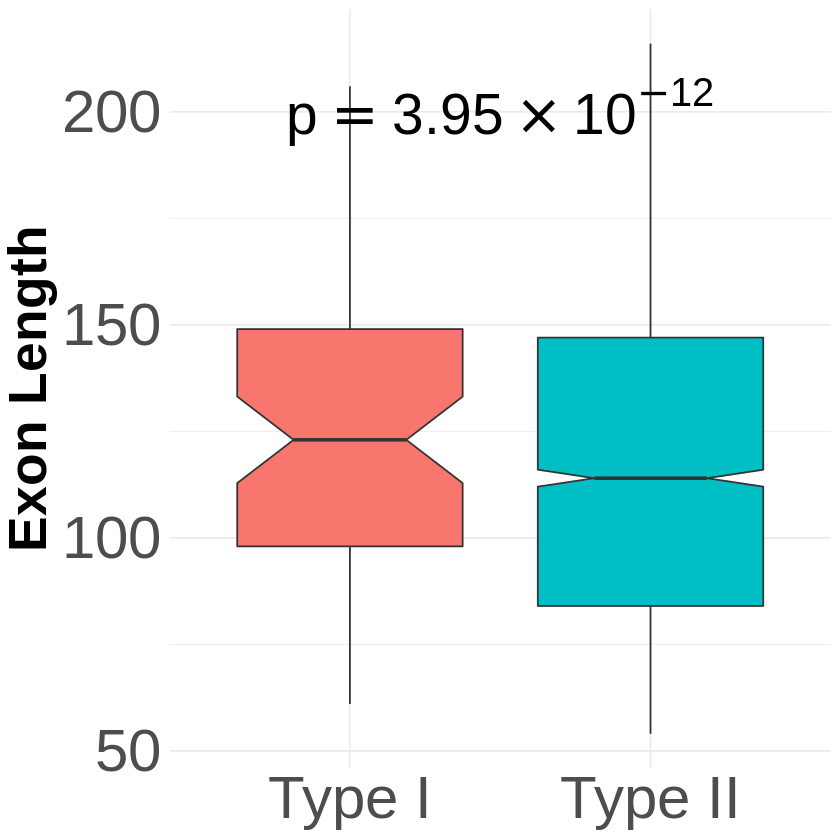

In [40]:
## get numbers
mean(df$score[df$type=="Type I"])
mean(df$score[df$type=="Type II"])
sum(df$type=="Type I")
sum(df$type=="Type II")


e.lengths.group1<-as.tab1$exonEnd-as.tab1$exonStart_0base

e.lengths.group2<-as.tab2$exonEnd-as.tab2$exonStart_0base
mean(e.lengths.group1)
mean(e.lengths.group2)
wilcox.test(e.lengths.group1,e.lengths.group2,paired = F)


df<-data.frame(len=c(e.lengths.group1,e.lengths.group2),type=c(rep(1,length(e.lengths.group1)),rep(2,length(e.lengths.group2))))
df$type <-  ifelse (df$type==1, "Type II", "Type I") 
df$type <- as.factor(df$type) 

pn<-ggplot(df, aes(x=type, y=len,fill=type, group=type))  + geom_boxplot(notch=TRUE, outlier.shape=NA) + theme_minimal()  
pn<-pn+ scale_y_continuous(limits = quantile(df$len, c(0.1, 0.9))) + guides(fill=FALSE)
pn<- pn + theme(axis.text = element_text(size=0, hjust=0.5),axis.ticks.x=element_blank(),
                axis.title.x=element_blank(),
                axis.title.y = element_text(face="bold",  size=32),
                axis.text.x = element_text(size=36),
                axis.text.y = element_text(size=36),
                legend.position="none")   +ylab('Exon Length')
#pn <- pn +  scale_fill_npg() 
my.pval = paste0("p==", wilcox.test(e.lengths.group1,e.lengths.group2,paired = F)$p.value)
# p val is 3.9462838487075e-12
my.pval = "p==3.95 %*% 10 ^ -12"  ##
pn <- pn + annotate("text",
                    x=1.5,
                    y=200,
                    label= as.character(my.pval),
                    parse=TRUE,
                    fontface="bold",
                    size=12) 
pn2<-pn
pn2

## Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### 1. Checksums with the sha256 algorithm

In [ ]:
figure_id   = "<the-figure-i-am-working-on>"

message("Generating sha256 checksums of the artefacts in the `..data/` directory .. ")
system(paste0("cd ../data/ && sha256sum * > ../metadata/", figure_id, "_sha256sums.txt"), intern = TRUE)
message("Done!\n")

data.table::fread(paste0("../metadata/", figure_id, "_sha256sums.txt"), header = FALSE, col.names = c("sha256sum", "file"))

### 2. Libraries metadata

In [ ]:
figure_id   = "<the-figure-i-am-working-on>"

dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", figure_id, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", figure_id ,"_utils_info.rds"))
message("Done!\n")

session_info$platform
session_info$packages[session_info$packages$attached==TRUE, ]